In [89]:
%config IPCompleter.greedy=True

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
data_5b = pd.read_csv('data/5b.csv')
data_5b['estimated/n'] = data_5b['estimated'] / data_5b['n']
data_5b

,k,n,expected,estimated,estimated/n
0,2,1,1,1,1.000000
1,2,2,2,2,1.000000
2,2,3,3,1,0.333333
3,2,4,4,5,1.250000
4,2,5,5,3,0.600000
...,...,...,...,...,...
49995,400,9996,6358,2970,0.297119
49996,400,9997,6358,3092,0.309293
49997,400,9998,6396,3168,0.316863
49998,400,9999,6343,3133,0.313331


No handles with labels found to put in legend.


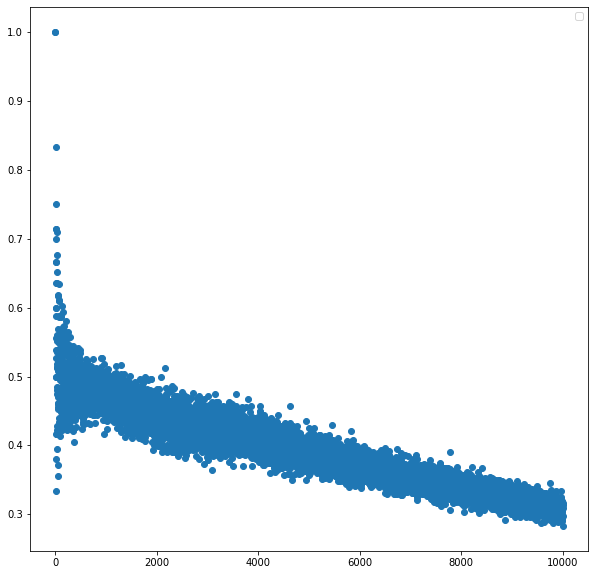

In [92]:
x = np.linspace(1, 10000, 10000)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, data_5b['estimated/n'][40000:50000])
ax.legend()

In [93]:
data_6 = pd.read_csv('data/6.csv')
data_6

,hash,b,expected,estimated
0,md5,8,6307,127
1,md5,8,6342,127
2,md5,8,6306,127
3,md5,8,6268,127
4,md5,8,6294,127
...,...,...,...,...
23995,sha512,256,6282,6138
23996,sha512,256,6386,6148
23997,sha512,256,6303,6053
23998,sha512,256,6318,5893


In [94]:
summary_6 = data_6.groupby(['hash', 'b']).agg([np.min, np.max, np.mean, np.var])
summary_6

expected                              estimated                  \
               amin  amax      mean          var      amin  amax      mean   
hash   b                                                                     
md5    8       6213  6438  6319.646   955.013698       127   127   127.000   
       16      6232  6420  6320.505   965.649625       742   751   747.664   
       32      6207  6431  6320.367  1007.832143       748   757   752.750   
       64      6223  6433  6321.995   998.279254       748   757   752.742   
       128     6232  6402  6320.550   952.874374      2868  3442  3154.087   
       256     6222  6434  6320.552   950.351648      2870  3397  3153.709   
sha1   8       6230  6432  6321.002  1040.432428       127   127   127.000   
       16      6189  6422  6320.246   931.176661       744   753   749.530   
       32      6213  6431  6322.505   980.278253       750   758   753.764   
       64      6220  6415  6320.247  1043.681673       750   757   753.762   
       128     6219  6440  6320.333  1016.640752      6137  7346  6766.439   
       256     6211  6420  6320.821   936.803763      2887  3532  3159.346   
sha256 8       6231  6416  6320.621   930.660019       127   127   127.000   
       16      6228  6425  6320.449   998.608007       740   749   745.541   
       32      6233  6418  6322.111   846.168848       745   753   749.355   
       64      6217  6409  6320.086   972.521125       744   753   749.253   
       128     6229  6419  6319.672  1075.894310      5872  7122  6506.787   
       256     6216  6418  6320.765   954.268043      2820  3339  3093.619   
sha512 8       6232  6431  6320.922   957.321237       127   127   127.000   
       16      6220  6419  6321.313  1013.622654       742   750   745.418   
       32      6222  6430  6322.608   963.565902       745   754   749.624   
       64      6217  6426  6320.992   929.543479       745   754   749.587   
       128     6220  6430  6320.538   937.600156      5740  7057  6288.543   
       256     6226  6417  6321.223   948.193464      5503  6485  5936.076   

                          
                     var  
hash   b                  
md5    8        0.000000  
       16       1.878983  
       32       2.520020  
       64       2.576012  
       128   7014.467899  
       256   6517.023342  
sha1   8        0.000000  
       16       1.650751  
       32       1.744048  
       64       1.741097  
       128  41705.962241  
       256   9208.326611  
sha256 8        0.000000  
       16       2.184504  
       32       1.226201  
       64       1.372363  
       128  43846.049681  
       256   6924.137977  
sha512 8        0.000000  
       16       1.566843  
       32       2.693317  
       64       2.526958  
       128  34234.004155  
       256  22556.923147

# Zadanie 7

W tym zadaniu należało porównać teoretyczne wyniki koncentracji estymatora $\hat{n}$ wykorzystaując nierówności **Czebyszewa** i **Chernoffa**. Dla $n = 1, \ldots, 10^4$ i $\alpha \in \{5\%, 1\%, 0.5\% }$